# Data Preparation/ Feature Engineering

### Data Summary

The following dataset came from the UCI Machine Learning Repository. It has 205 entries and 26 columns:

- Symboling: numerical integer values (-3,-2...2,3)
- Normalized-losses: continuous from (65 to 256)
- Make: categorical, [alfa-romero, audi, bmw, chevrolet, dodge, honda,
                    isuzu, jaguar, mazda, mercedes-benz, mercury,
                    mitsubishi, nissan, peugot, plymouth, porsche,
                    renault, saab, subaru, toyota, volkswagen, volvo]
- Fuel-type: categorical, [diesel, gas]
- Aspiration: categorical, [std, turbo]
- Num-of-doors: categorical, [four, two]
- Body-style: categorical, [hardtop, wagon, sedan, hatchback, convertible]
- Drive-wheels: categorical, [4wd, fwd, rwd]
- Engine-location: categorical, [front, rear]
- Wheel-base: continuous from (86.6 120.9)
- Length: continuous from (141.1 to 208.1)
- Width: continuous from (60.3 to 72.3)
- Height: continuous from (47.8 to 59.8)
- Curb-weight: continuous from (1488 to 4066)
- Engine-type: categorical, [dohc, dohcv, l, ohc, ohcf, ohcv, rotor]
- Num-of-cylinders: categorical, [eight, five, four, six, three, twelve, 
                                two]
- Engine-size: continuous from (61 to 326)
- Fuel-system: categorical, [1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi]
- Bore: continuous from (2.54 to 3.94)
- Stroke: continuous from (2.07 to 4.17)
- Compression-ratio: continuous from (7 to 23)
- Horsepower: continuous from (48 to 288)
- Peak-rpm: continuous from (4150 to 6600)
- City-mpg: continuous from (13 to 49)
- Highway-mpg: continuous from (16 to 54)
- Price: continuous from (5118 to 45400)

#### Data Initialization:

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import Binarizer

df = pd.read_csv('https://raw.githubusercontent.com/jonpb99/Data_Analytics_List_Comprehension/main/Data_Preperation-Feature_Engineering/imports-85.csv', header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
df = df.rename(columns={0:'symbolizing', 1:'normalized-losses', 2:'make', 3:'fuel-type', 4:'aspiration', 
                          5:'num-of-doors', 6:'body-style', 7:'drive-wheels', 8:'engine-location', 9:'wheel-base', 
                          10:'length', 11:'width', 12:'height', 13:'curb-weight', 14:'engine-type', 
                          15:'num-of-cylinders', 16:'engine-size', 17:'fuel-system', 18:'bore', 19:'stroke', 
                          20:'compression-ratio', 21:'horsepower', 22:'peak-rpm', 23:'city-mpg', 24:'highway-mpg', 
                          25:'price'})
df.head()


,symbolizing,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolizing        205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### Creating Subset:

In [44]:
df1 = df[['symbolizing','normalized-losses','aspiration','body-style','num-of-cylinders','engine-size','horsepower','city-mpg','highway-mpg','price']]
df1.head()

,symbolizing,normalized-losses,aspiration,body-style,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,std,convertible,four,130,111,21,27,13495
1,3,?,std,convertible,four,130,111,21,27,16500
2,1,?,std,hatchback,six,152,154,19,26,16500
3,2,164,std,sedan,four,109,102,24,30,13950
4,2,164,std,sedan,five,136,115,18,22,17450


In [45]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symbolizing        205 non-null    int64 
 1   normalized-losses  205 non-null    object
 2   aspiration         205 non-null    object
 3   body-style         205 non-null    object
 4   num-of-cylinders   205 non-null    object
 5   engine-size        205 non-null    int64 
 6   horsepower         205 non-null    object
 7   city-mpg           205 non-null    int64 
 8   highway-mpg        205 non-null    int64 
 9   price              205 non-null    object
dtypes: int64(4), object(6)
memory usage: 16.1+ KB
None


In [46]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [47]:
df1.min()

symbolizing                   -2
normalized-losses            101
aspiration                   std
body-style           convertible
num-of-cylinders           eight
engine-size                   61
horsepower                   100
city-mpg                      13
highway-mpg                   16
price                      10198
dtype: object

In [48]:
zero_height = df1[df1['normalized-losses']=='?'].count()['normalized-losses'] #gets count of records with zero height
zero_height

41

In [49]:
df2 = df1[df1['price']!='?']

df2.price = df2.price.astype(int)

#zero_height = df2[df2['price']=='?'].count()['price'] #gets count of records with zero height
#zero_height

#df2['price'].unique()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symbolizing        201 non-null    int64 
 1   normalized-losses  201 non-null    object
 2   aspiration         201 non-null    object
 3   body-style         201 non-null    object
 4   num-of-cylinders   201 non-null    object
 5   engine-size        201 non-null    int64 
 6   horsepower         201 non-null    object
 7   city-mpg           201 non-null    int64 
 8   highway-mpg        201 non-null    int64 
 9   price              201 non-null    int32 
dtypes: int32(1), int64(4), object(5)
memory usage: 16.5+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
df3 = df1[df1['horsepower']!='?']

df3.horsepower = df3.horsepower.astype(int)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symbolizing        203 non-null    int64 
 1   normalized-losses  203 non-null    object
 2   aspiration         203 non-null    object
 3   body-style         203 non-null    object
 4   num-of-cylinders   203 non-null    object
 5   engine-size        203 non-null    int64 
 6   horsepower         203 non-null    int32 
 7   city-mpg           203 non-null    int64 
 8   highway-mpg        203 non-null    int64 
 9   price              203 non-null    object
dtypes: int32(1), int64(4), object(5)
memory usage: 16.7+ KB


In [51]:
df4 = df1[df1['normalized-losses']!='?']

df4.rename(columns = {'normalized-losses':'normalized_losses'}, inplace = True)

df4.normalized_losses = df4.normalized_losses.astype(int)
df4.horsepower = df4.horsepower.astype(int)
df4.price = df4.price.astype(int)

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 3 to 204
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symbolizing        164 non-null    int64 
 1   normalized_losses  164 non-null    int32 
 2   aspiration         164 non-null    object
 3   body-style         164 non-null    object
 4   num-of-cylinders   164 non-null    object
 5   engine-size        164 non-null    int64 
 6   horsepower         164 non-null    int32 
 7   city-mpg           164 non-null    int64 
 8   highway-mpg        164 non-null    int64 
 9   price              164 non-null    int32 
dtypes: int32(3), int64(4), object(3)
memory usage: 12.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [52]:
df4.min()

symbolizing                   -2
normalized_losses             65
aspiration                   std
body-style           convertible
num-of-cylinders           eight
engine-size                   61
horsepower                    48
city-mpg                      15
highway-mpg                   18
price                       5118
dtype: object

<AxesSubplot:xlabel='symbolizing', ylabel='count'>

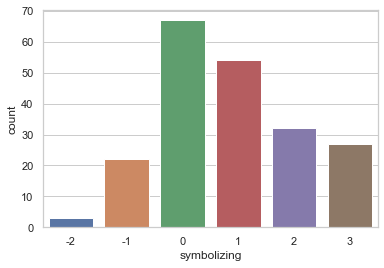

In [53]:
sns.set(style='whitegrid')
sns.countplot(x="symbolizing", data=df)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='count'>

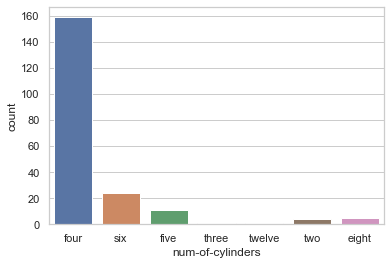

In [54]:
sns.countplot(x="num-of-cylinders", data=df)

<AxesSubplot:xlabel='body-style', ylabel='count'>

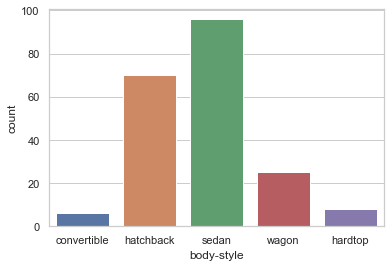

In [55]:
sns.countplot(x="body-style", data=df)

<AxesSubplot:xlabel='aspiration', ylabel='count'>

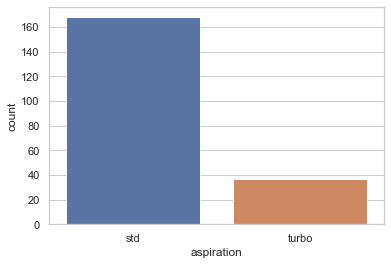

In [56]:
sns.countplot(x="aspiration", data=df)

<AxesSubplot:xlabel='price', ylabel='normalized_losses'>

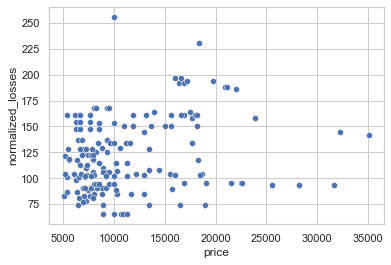

In [57]:
sns.scatterplot(x = "price", y = "normalized_losses", data = df4)

<AxesSubplot:xlabel='horsepower', ylabel='normalized_losses'>

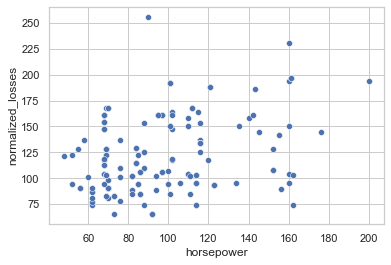

In [58]:
sns.scatterplot(x = "horsepower", y = "normalized_losses", data = df4)

<AxesSubplot:xlabel='symbolizing', ylabel='normalized_losses'>

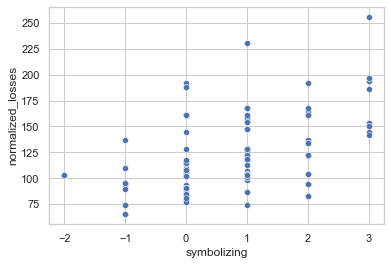

In [59]:
sns.scatterplot(x = "symbolizing", y = "normalized_losses", data = df4)

<AxesSubplot:xlabel='symbolizing', ylabel='normalized_losses'>

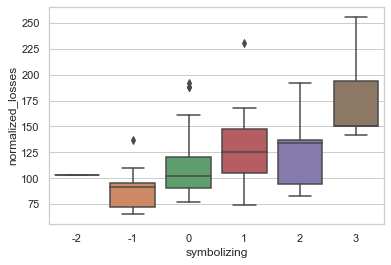

In [60]:
sns.boxplot(x="symbolizing", y="normalized_losses", data=df4)

<AxesSubplot:xlabel='aspiration', ylabel='normalized_losses'>

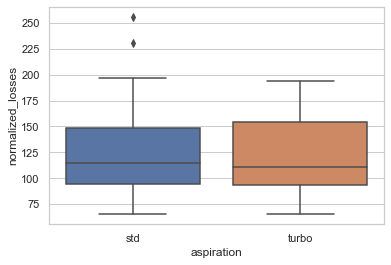

In [61]:
sns.boxplot(x="aspiration", y="normalized_losses", data=df4)

<AxesSubplot:xlabel='num-of-cylinders', ylabel='normalized_losses'>

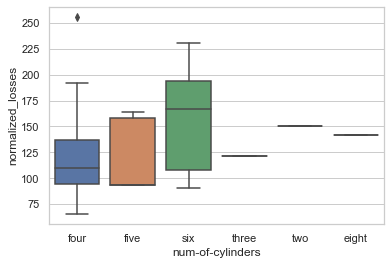

In [62]:
sns.boxplot(x="num-of-cylinders", y="normalized_losses", data=df4)

<AxesSubplot:xlabel='body-style', ylabel='normalized_losses'>

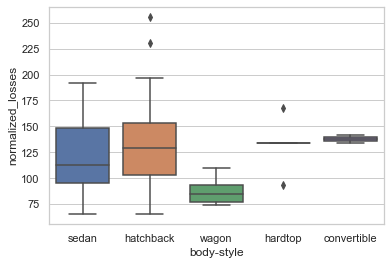

In [63]:
sns.boxplot(x="body-style", y="normalized_losses", data=df4)

<AxesSubplot:xlabel='city-mpg', ylabel='normalized_losses'>

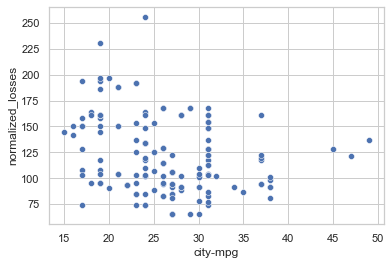

In [64]:
sns.scatterplot(x = "city-mpg", y = "normalized_losses", data = df4)

<AxesSubplot:xlabel='horsepower', ylabel='engine-size'>

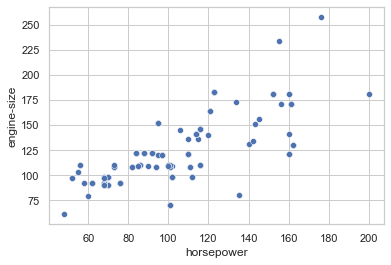

In [65]:
sns.scatterplot(x = "horsepower", y = "engine-size", data = df4)

#### Inference:

Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.

In [66]:
df5= df1.copy()
df5.head()

,symbolizing,normalized-losses,aspiration,body-style,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,std,convertible,four,130,111,21,27,13495
1,3,?,std,convertible,four,130,111,21,27,16500
2,1,?,std,hatchback,six,152,154,19,26,16500
3,2,164,std,sedan,four,109,102,24,30,13950
4,2,164,std,sedan,five,136,115,18,22,17450


In [67]:
print(df5)

     symbolizing normalized-losses aspiration   body-style num-of-cylinders  \
0              3                 ?        std  convertible             four   
1              3                 ?        std  convertible             four   
2              1                 ?        std    hatchback              six   
3              2               164        std        sedan             four   
4              2               164        std        sedan             five   
..           ...               ...        ...          ...              ...   
200           -1                95        std        sedan             four   
201           -1                95      turbo        sedan             four   
202           -1                95        std        sedan              six   
203           -1                95      turbo        sedan              six   
204           -1                95      turbo        sedan             four   

     engine-size horsepower  city-mpg  highway-mpg 

I've decided to binarize the symbolizing variable as I believe it can tell us whether the vehicle described is considered safe or risky. While it did that before, rating each entry between -3 and 3 (-3 is never used, indicating no car is without any risk), a simple safe (0) or not safe (1) may be more effective.

In [68]:
binarizer = Binarizer(threshold=float((df5[['symbolizing']]).mean()))
binarized_features = binarizer.fit_transform(df5[['symbolizing']])
#print(binarized_features)
#print(df5)
df5.loc[9]['symbolizing']
#binarized_features[0][0]

0

In [69]:
print(binarized_features[9][0])

0


In [70]:
for i in df5.index:
    #print(df5.loc[i,'symbolizing'])
    df5.loc[i,'symbolizing'] = binarized_features[i][0]

In [71]:
#print(binarized_features)
print(df5)

     symbolizing normalized-losses aspiration   body-style num-of-cylinders  \
0              1                 ?        std  convertible             four   
1              1                 ?        std  convertible             four   
2              1                 ?        std    hatchback              six   
3              1               164        std        sedan             four   
4              1               164        std        sedan             five   
..           ...               ...        ...          ...              ...   
200            0                95        std        sedan             four   
201            0                95      turbo        sedan             four   
202            0                95        std        sedan              six   
203            0                95      turbo        sedan              six   
204            0                95      turbo        sedan             four   

     engine-size horsepower  city-mpg  highway-mpg 

Consider the number-of-doors and price variables: Based on your EDA work, how many
missing data values occur within each of these attributes? As we’ve learned, missing data values can
impede the proper functioning of many machine learning algorithms. To address the missing the
number-of-doors and price values, you have been instructed to formulate what you believe will be an
effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. 
Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbolizing        205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [73]:
nl_missing = df[df['normalized-losses']=='?'].count()['normalized-losses']
nl_missing

41

In [74]:
bore_missing = df[df['bore']=='?'].count()['bore']
bore_missing

4

In [75]:
stroke_missing = df[df['stroke']=='?'].count()['stroke']
stroke_missing

4

In [76]:
hp_missing = df[df['horsepower']=='?'].count()['horsepower']
hp_missing

2

In [77]:
rpm_missing = df[df['peak-rpm']=='?'].count()['peak-rpm']
rpm_missing

2

In [78]:
p_missing = df[df['price']=='?'].count()['price']
p_missing

4

In [79]:
nd_missing = df[df['num-of-doors']=='?'].count()['num-of-doors']
nd_missing

2

The 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price', and 'num-of-doors' variables have between 2 and 4 values missing each. The 'normalized-losses' variable has 41 missing values.

In [80]:
df6 = df.copy()
imp = IterativeImputer(max_iter=100, missing_values=?, random_state=0)

SyntaxError: invalid syntax (<ipython-input-80-763b2ea77783>, line 2)

In [81]:
imp.fit(df6)

ValueError: could not convert string to float: '?'

df=original dataset
df1=dataset w/important columns
df2=df1 w/o price
df3=df1 w/o horsepower
df4=df1 w/o price,hp,normalized-losses